# How to Choose Loss Functions When Training Deep Learning Neural Networks

[JASON BROWNLEE MACHINE LEARNING MASTERY](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)

Tutorial Overview

This tutorial is divided into three parts; they are:

Regression Loss Functions


Mean Squared Error Loss - default - distribution of target is gaussian - square of error means larger errors penalised more than smaller ones (Keras mse or mean_squared_error)

Mean Squared Logarithmic Error Loss

Mean Absolute Error Loss - distribution of target variable is mainly gaussian but may heave outliers (keras - mean_absolute_error)

Binary Classification Loss Functions - targets are either of two labels

Binary Cross-Entropy (keras - binary_cross_entropy)

Hinge Loss - for use with SVM - binay classification where target values are in the set {-1,1}
encourages examples to have the correct sign - assigning more errorwhen thee is a differene in sign between actual/predicted class values

Squared Hinge Loss - square of hinge loss - hass effect of smoothing the surfaceof the error function and making it easier to work with numerically


Multi-Class Classification Loss Functions - targets can belong to one of many labels or classes - predict probability of example beloging to each known class

Multi-Class Cross-Entropy Loss - use this first - calculate a score that summarizes the ave diff between actual and predicted probability distributions  for all classes - keras -categorical_cross_entropy

Sparse Multiclass Cross-Entropy Loss - large nb of labels- eg words in a vocabulary may have tens or hundreds of thousands of categories, one for each label. No one-hot encoding 
keras - sparse_categorical_crossentropy

Kullback Leibler Divergence Loss KL divergence - measure of how one probability distribution differs from a baseline distribution KLdiv of 0 suggest distributions are identical
calculates how much information is lost if the predicted target distributon is use to approximate the desired target probablity distribuion
KLd more commonly used when using models that learn to approximate a more complex fn than simply multi-class ie autoencoding used for learning a dense feature representation under a model that must construct the original input

keras - kullback_liebler_divergence 

In [ ]:
#Regression loss function

In [7]:
#'/Users/dexterdsilva/Documents/Developer/MachineLearning/brownlee_mlm'

import os
os.path.abspath('')

'/Users/dexterdsilva/Documents/Developer/MachineLearning/brownlee_mlm'

In [79]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt

In [6]:
import keras
print(keras.__version__)
import tensorflow as tf
print(tf.__version__)

2.3.1
1.15.0


In [80]:
#generate regression dataset
#20 
X,y=make_regression(n_samples=1000, n_features=20,noise=0.1,
                   random_state=1)

In [81]:
X[0]

array([ 0.58372668,  0.78593639, -0.17187155,  0.66928708,  1.67181016,
        0.59831823,  1.49807611,  0.27925069, -0.31705821, -0.41961259,
       -0.21796143,  0.81186707, -0.79215259,  0.56621046,  0.97473625,
       -0.8223744 ,  1.03007179, -0.67945508, -0.21540618,  1.03118947])

In [82]:
print(y.shape)
f'{y[0]}'
print(type(y))

(1000,)
<class 'numpy.ndarray'>


In [83]:
X=StandardScaler().fit_transform(X)

In [84]:
X[0]

array([ 0.64516745,  0.76000873, -0.18010938,  0.65740427,  1.65197553,
        0.56574009,  1.50368462,  0.30416606, -0.29634854, -0.37041198,
       -0.22745535,  0.72392625, -0.76421488,  0.55675061,  0.96630152,
       -0.82406123,  0.95038766, -0.76479647, -0.2088517 ,  1.04702956])

In [85]:
y=StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

In [86]:
n_train=500
trainX, testX = X[:n_train,:], X[n_train:,:]
trainy, testy = y[:n_train], y[n_train:]

In [87]:
model= Sequential()
model.add(Dense(25, input_dim=20,activation='relu',
               kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

In [88]:
opt=SGD(lr=0.01, momentum=0.9)

## Mean Squared Error Loss

In [89]:
model.compile(loss='mse', optimizer = opt)

In [90]:
h=model.fit(trainX, trainy, validation_data=(testX,testy),
           epochs=100,
           verbose=0)

In [93]:
h.history.keys()

dict_keys(['val_loss', 'loss'])

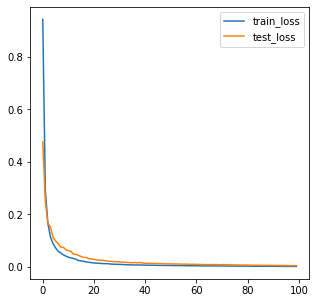

In [45]:
fig= plt.figure(figsize=(5,5))
plt.plot(h.history['loss'],label='train_loss')
plt.plot(h.history['val_loss'], label='test_loss')
plt.legend()
plt.show()

## Mean Squared Logarithmic Error Loss

In [67]:
model=Sequential()
model.add(Dense(25, input_dim=20, activation ='relu',
               kernel_initializer = 'he_uniform'))
model.add(Dense(1, activation = 'linear'))
opt=SGD(lr=0.1, momentum=0.9)
model.compile(loss='mean_squared_logarithmic_error',
             optimizer=opt,
             metrics=['mse'])


In [68]:
print(trainX.shape,'   ',trainy.shape,'  ', testX.shape,' ', testy.shape)

(500, 20)     (500,)    (500, 20)   (500,)


In [69]:
h = model.fit(trainX, trainy,
              validation_data=(testX, testy),
             epochs=200,
              verbose=0)

In [70]:
#evaluate the model
#_,train_mse=model.evaluate(trainX, trainy, verbose=0)
#_,test_mse=model.evaluate(testX, testy, verbose=0)

In [71]:
#print('Train: {:.2f} Test {:.2f}'.format(train_mse, test_mse))

Train: 0.32 Test 0.38


In [75]:
h.history.keys()

dict_keys(['val_loss', 'val_mse', 'loss', 'mse'])

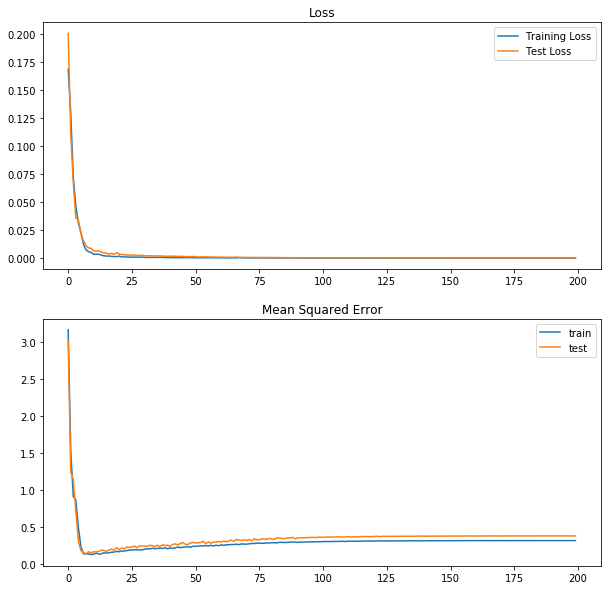

In [78]:
fig=plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('Loss')
plt.plot(h.history['loss'],label='Training Loss')
plt.plot(h.history['val_loss'],label = 'Test Loss')
plt.legend()
plt.subplot(212)
plt.title('Mean Squared Error')
plt.plot(h.history['mse'], label='train')
plt.plot(h.history['val_mse'], label='test')
plt.legend()
plt.show()


# Mean Absolute Error Loss

In [130]:
X,y=make_regression(n_samples=1000, n_features=20,
                   noise=0.1, random_state=1)

(1000, 20) (1000,)    <class 'numpy.ndarray'>


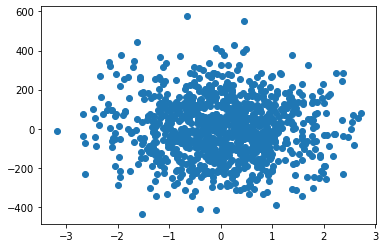

In [131]:
print(X.shape, y.shape,'  ', type(y))
plt.scatter(X[:,1],y)

In [132]:
len(y)

1000

In [135]:
X=StandardScaler().fit_transform(X)
y=StandardScaler().fit_transform(y.reshape(len(y),1))

In [139]:
n_train=500
trainX, testX = X[:n_train,:],X[n_train:,:]
trainy, testy = y[:n_train], y[n_train:]

In [142]:
model= Sequential()
model.add(Dense(25,input_dim=20, 
                activation='relu',
               kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt=SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_absolute_error', optimizer=opt,metrics=['mse'])

In [143]:
h=model.fit(trainX, trainy,validation_data=(testX, testy),
            epochs=100, verbose=1)

Train on 500 samples, validate on 500 samples
Epoch 1/100
500/500 [==============================] - 0s 343us/step - loss: 1.1116 - mse: 2.0405 - val_loss: 0.9010 - val_mse: 1.3062
Epoch 2/100
500/500 [==============================] - 0s 72us/step - loss: 0.6478 - mse: 0.6574 - val_loss: 0.5350 - val_mse: 0.4615
Epoch 3/100
500/500 [==============================] - 0s 85us/step - loss: 0.4219 - mse: 0.2879 - val_loss: 0.3912 - val_mse: 0.2461
Epoch 4/100
500/500 [==============================] - 0s 98us/step - loss: 0.3411 - mse: 0.1913 - val_loss: 0.3773 - val_mse: 0.2153
Epoch 5/100
500/500 [==============================] - 0s 99us/step - loss: 0.3092 - mse: 0.1570 - val_loss: 0.3186 - val_mse: 0.1552
Epoch 6/100
500/500 [==============================] - 0s 86us/step - loss: 0.2446 - mse: 0.1054 - val_loss: 0.2663 - val_mse: 0.1167
Epoch 7/100
500/500 [==============================] - 0s 105us/step - loss: 0.2146 - mse: 0.0802 - val_loss: 0.2536 - val_mse: 0.1060
Epoch 8/100
50

In [144]:
#_,train_mse=model.evaluate(trainX, trainy, verbose=1)

500/500 [==============================] - 0s 20us/step


In [146]:
#_,test_mse=model.evaluate(testX, testy, verbose=1)

500/500 [==============================] - 0s 19us/step


In [148]:
h.history.keys()

dict_keys(['val_loss', 'val_mse', 'loss', 'mse'])

In [151]:
#print('Train: {:.4f}  Test:{:.4f}'.format(train_mse, test_mse))

Train: 0.0023  Test:0.0020


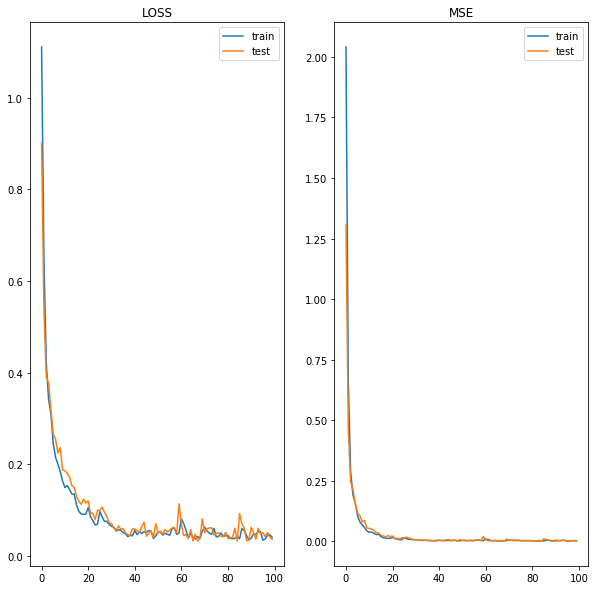

In [153]:
fig=plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('LOSS')
plt.plot(h.history['loss'], label='train')
plt.plot(h.history['val_loss'], label='test')
plt.legend()
plt.subplot(122)
plt.title('MSE')
plt.plot(h.history['mse'],label='train')
plt.plot(h.history['val_mse'], label='test')
plt.legend()
plt.show()

# Binary Classification Loss Functions

In [159]:
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from numpy import where
import matplotlib.pyplot as plt
%matplotlib inline

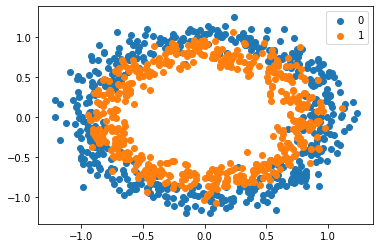

In [170]:
X,y = make_circles(n_samples=1000,noise=0.1, random_state=1)
for i in range(2):
    samples_idx= where(y==i)
    plt.scatter(X[samples_idx,0], X[samples_idx,1], label=str(i))

plt.legend()
plt.show()

In [167]:
print(X[:5])
print(y[:5])

[[ 0.92787748 -0.04521731]
 [-0.54303182 -0.75444674]
 [ 0.9246533  -0.71492522]
 [-0.10217077 -0.89283523]
 [-1.01719242  0.24737775]]
[1 1 0 0 0]


In [182]:
n_train=500
trainX,testX=X[:n_train,:],X[:n_train]
trainy,testy = y[:n_train], y[:n_train]

In [183]:
print(trainX.shape ,'  ', trainy.shape)

(500, 2)    (500,)


# Binary Cross Entropy

In [184]:
model=Sequential()
model.add(Dense(50, input_dim=2, activation='relu',
               kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
opt=SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [185]:
h=model.fit(trainX, trainy, validation_data=(testX,testy),
           epochs=200,verbose=1)

Train on 500 samples, validate on 500 samples
Epoch 1/200
500/500 [==============================] - 0s 485us/step - loss: 0.7233 - accuracy: 0.5000 - val_loss: 0.6939 - val_accuracy: 0.5260
Epoch 2/200
500/500 [==============================] - 0s 77us/step - loss: 0.6919 - accuracy: 0.5180 - val_loss: 0.6829 - val_accuracy: 0.5340
Epoch 3/200
500/500 [==============================] - 0s 86us/step - loss: 0.6810 - accuracy: 0.5440 - val_loss: 0.6756 - val_accuracy: 0.5500
Epoch 4/200
500/500 [==============================] - 0s 92us/step - loss: 0.6761 - accuracy: 0.5500 - val_loss: 0.6692 - val_accuracy: 0.5500
Epoch 5/200
500/500 [==============================] - 0s 89us/step - loss: 0.6699 - accuracy: 0.5380 - val_loss: 0.6643 - val_accuracy: 0.5560
Epoch 6/200
500/500 [==============================] - 0s 89us/step - loss: 0.6645 - accuracy: 0.5540 - val_loss: 0.6593 - val_accuracy: 0.5660
Epoch 7/200
500/500 [==============================] - 0s 97us/step - loss: 0.6610 - accu

500/500 [==============================] - 0s 75us/step - loss: 0.3994 - accuracy: 0.8220 - val_loss: 0.3921 - val_accuracy: 0.8380
Epoch 114/200
500/500 [==============================] - 0s 77us/step - loss: 0.3992 - accuracy: 0.8360 - val_loss: 0.3915 - val_accuracy: 0.8360
Epoch 115/200
500/500 [==============================] - 0s 71us/step - loss: 0.3962 - accuracy: 0.8340 - val_loss: 0.3914 - val_accuracy: 0.8360
Epoch 116/200
500/500 [==============================] - 0s 73us/step - loss: 0.3932 - accuracy: 0.8400 - val_loss: 0.3918 - val_accuracy: 0.8420
Epoch 117/200
500/500 [==============================] - 0s 72us/step - loss: 0.3959 - accuracy: 0.8280 - val_loss: 0.3903 - val_accuracy: 0.8340
Epoch 118/200
500/500 [==============================] - 0s 73us/step - loss: 0.3929 - accuracy: 0.8300 - val_loss: 0.3897 - val_accuracy: 0.8340
Epoch 119/200
500/500 [==============================] - 0s 72us/step - loss: 0.3974 - accuracy: 0.8200 - val_loss: 0.3897 - val_accuracy:

In [186]:
#_,train_acc=model.evaluate(trainX,trainy, verbose=1)

500/500 [==============================] - 0s 44us/step


In [189]:
#_,test_acc=model.evaluate(testX, testy,verbose=1)

500/500 [==============================] - 0s 25us/step


In [190]:
#print('Train: {:.4f} Test:{:.4f}'.format(train_acc, test_acc))

Train: 0.8360 Test:0.8360


In [191]:
h.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

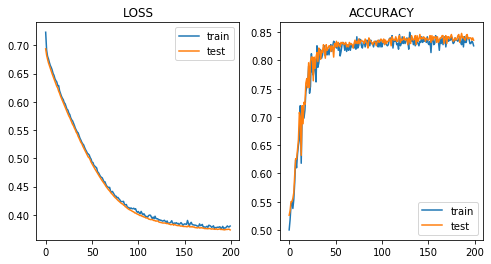

In [196]:
fig=plt.figure(figsize=(8,4))
plt.subplot(121)
plt.title("LOSS")
plt.plot(h.history['loss'], label='train')
plt.plot(h.history['val_loss'], label='test')
plt.legend()
plt.subplot(122)
plt.title("ACCURACY")
plt.plot(h.history['accuracy'], label='train')
plt.plot(h.history['val_accuracy'], label='test')
plt.legend()
plt.show()

# Hinge Loss

In [197]:
y[where(y==0)]= -1

In [204]:
X,y = make_circles(n_samples=1000, noise=0.1, random_state=1)
y[where(y==0)]= -1

In [206]:
n_train=500
trainX,testX= X[:n_train,:],X[n_train:,:]
trainy,testy=y[:n_train],y[n_train:]

In [212]:
model=Sequential()
model.add(Dense(50,input_dim=2,activation='relu',
               kernel_initializer='he_uniform'))
model.add(Dense(1, activation='tanh'))
opt=SGD(lr=0.01, momentum=0.9)
model.compile(loss='hinge', optimizer=opt,metrics=['accuracy'])

In [213]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 50)                150       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 51        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [214]:
h=model.fit(trainX,trainy,validation_data=(testX,testy),
           epochs=200,
           verbose=1)

Train on 500 samples, validate on 500 samples
Epoch 1/200
500/500 [==============================] - 0s 751us/step - loss: 1.0000 - accuracy: 0.2580 - val_loss: 0.9999 - val_accuracy: 0.2260
Epoch 2/200
500/500 [==============================] - 0s 122us/step - loss: 0.9721 - accuracy: 0.2580 - val_loss: 0.9849 - val_accuracy: 0.3440
Epoch 3/200
500/500 [==============================] - 0s 138us/step - loss: 0.9314 - accuracy: 0.3600 - val_loss: 0.9791 - val_accuracy: 0.3160
Epoch 4/200
500/500 [==============================] - 0s 148us/step - loss: 0.9369 - accuracy: 0.3180 - val_loss: 0.9726 - val_accuracy: 0.2940
Epoch 5/200
500/500 [==============================] - 0s 179us/step - loss: 0.9093 - accuracy: 0.3500 - val_loss: 0.9614 - val_accuracy: 0.3220
Epoch 6/200
500/500 [==============================] - 0s 175us/step - loss: 0.8992 - accuracy: 0.3720 - val_loss: 0.9478 - val_accuracy: 0.3460
Epoch 7/200
500/500 [==============================] - 0s 160us/step - loss: 0.8860 

Epoch 57/200
500/500 [==============================] - 0s 137us/step - loss: 0.4417 - accuracy: 0.6980 - val_loss: 0.4600 - val_accuracy: 0.6580
Epoch 58/200
500/500 [==============================] - 0s 112us/step - loss: 0.4435 - accuracy: 0.6960 - val_loss: 0.4493 - val_accuracy: 0.6840
Epoch 59/200
500/500 [==============================] - 0s 120us/step - loss: 0.4336 - accuracy: 0.7160 - val_loss: 0.4496 - val_accuracy: 0.6660
Epoch 60/200
500/500 [==============================] - 0s 109us/step - loss: 0.4311 - accuracy: 0.7100 - val_loss: 0.4479 - val_accuracy: 0.6740
Epoch 61/200
500/500 [==============================] - 0s 131us/step - loss: 0.4309 - accuracy: 0.7100 - val_loss: 0.4426 - val_accuracy: 0.6840
Epoch 62/200
500/500 [==============================] - 0s 153us/step - loss: 0.4304 - accuracy: 0.7060 - val_loss: 0.4429 - val_accuracy: 0.6840
Epoch 63/200
500/500 [==============================] - 0s 136us/step - loss: 0.4242 - accuracy: 0.7120 - val_loss: 0.4376 -

500/500 [==============================] - 0s 127us/step - loss: 0.3743 - accuracy: 0.7680 - val_loss: 0.3905 - val_accuracy: 0.7280
Epoch 114/200
500/500 [==============================] - 0s 112us/step - loss: 0.3737 - accuracy: 0.7620 - val_loss: 0.3932 - val_accuracy: 0.7240
Epoch 115/200
500/500 [==============================] - 0s 122us/step - loss: 0.3746 - accuracy: 0.7580 - val_loss: 0.3942 - val_accuracy: 0.7300
Epoch 116/200
500/500 [==============================] - 0s 121us/step - loss: 0.3722 - accuracy: 0.7680 - val_loss: 0.3914 - val_accuracy: 0.7280
Epoch 117/200
500/500 [==============================] - 0s 109us/step - loss: 0.3700 - accuracy: 0.7700 - val_loss: 0.3921 - val_accuracy: 0.7340
Epoch 118/200
500/500 [==============================] - 0s 100us/step - loss: 0.3772 - accuracy: 0.7780 - val_loss: 0.3889 - val_accuracy: 0.7400
Epoch 119/200
500/500 [==============================] - 0s 101us/step - loss: 0.3782 - accuracy: 0.7740 - val_loss: 0.3975 - val_ac

Epoch 169/200
500/500 [==============================] - 0s 103us/step - loss: 0.3545 - accuracy: 0.7860 - val_loss: 0.3814 - val_accuracy: 0.7500
Epoch 170/200
500/500 [==============================] - 0s 99us/step - loss: 0.3559 - accuracy: 0.7920 - val_loss: 0.3714 - val_accuracy: 0.7620
Epoch 171/200
500/500 [==============================] - 0s 88us/step - loss: 0.3539 - accuracy: 0.7900 - val_loss: 0.3766 - val_accuracy: 0.7420
Epoch 172/200
500/500 [==============================] - 0s 100us/step - loss: 0.3514 - accuracy: 0.7920 - val_loss: 0.3710 - val_accuracy: 0.7500
Epoch 173/200
500/500 [==============================] - 0s 89us/step - loss: 0.3571 - accuracy: 0.7800 - val_loss: 0.3751 - val_accuracy: 0.7460
Epoch 174/200
500/500 [==============================] - 0s 100us/step - loss: 0.3488 - accuracy: 0.7940 - val_loss: 0.3802 - val_accuracy: 0.7540
Epoch 175/200
500/500 [==============================] - 0s 96us/step - loss: 0.3547 - accuracy: 0.7840 - val_loss: 0.371

In [217]:
model.metrics_names

['loss', 'accuracy']

In [224]:
#_,train_acc=model.evaluate(trainX,trainy, verbose=1)

500/500 [==============================] - 0s 44us/step


In [221]:
#_,test_acc=model.evaluate(testX,testy, verbose= 1)

500/500 [==============================] - 0s 42us/step


In [225]:
#print('Train: {:.4f} Test: {:.4f}'.format(train_acc, test_acc))

Train: 0.7980 Test: 0.7580


In [227]:
h.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

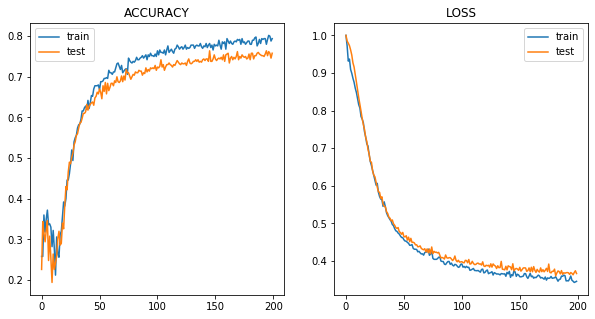

In [239]:
fig =plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('ACCURACY')
plt.plot(h.history['accuracy'], label='train')
plt.plot(h.history['val_accuracy'], label = 'test')
plt.legend()
plt.subplot(1,2,2)
plt.title("LOSS")
plt.plot(h.history['loss'], label='train')
plt.plot(h.history['val_loss'], label='test')
plt.legend()
plt.show()

# Squared Hinge Loss

In [244]:
X,y = make_circles(n_samples=1000, noise=0.1, random_state=1)
y[where(y==0)]= -1

In [246]:
n_train=500
trainX,testX = X[:n_train,:],X[n_train:,:]
trainy,testy=y[:n_train],y[n_train:]

In [259]:
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='tanh'))
opt=SGD(lr=0.01, momentum=0.9)
model.compile(loss='squared_hinge', optimizer=opt, metrics=['accuracy'])
h = model.fit(trainX,trainy,validation_data=(testX,testy), epochs=200, verbose=1)

Train on 500 samples, validate on 500 samples
Epoch 1/200
500/500 [==============================] - 0s 532us/step - loss: 1.0333 - accuracy: 0.0320 - val_loss: 0.9795 - val_accuracy: 0.0000e+00
Epoch 2/200
500/500 [==============================] - 0s 73us/step - loss: 0.9440 - accuracy: 0.0140 - val_loss: 0.8950 - val_accuracy: 0.0080
Epoch 3/200
500/500 [==============================] - 0s 92us/step - loss: 0.8864 - accuracy: 0.0240 - val_loss: 0.8386 - val_accuracy: 0.0000e+00
Epoch 4/200
500/500 [==============================] - 0s 87us/step - loss: 0.8553 - accuracy: 0.0700 - val_loss: 0.8436 - val_accuracy: 0.0340
Epoch 5/200
500/500 [==============================] - 0s 94us/step - loss: 0.8295 - accuracy: 0.0620 - val_loss: 0.7340 - val_accuracy: 0.0400
Epoch 6/200
500/500 [==============================] - 0s 92us/step - loss: 0.7919 - accuracy: 0.1200 - val_loss: 0.8021 - val_accuracy: 0.2240
Epoch 7/200
500/500 [==============================] - 0s 84us/step - loss: 0.724

500/500 [==============================] - 0s 111us/step - loss: 0.4929 - accuracy: 0.6680 - val_loss: 0.4523 - val_accuracy: 0.6400
Epoch 114/200
500/500 [==============================] - 0s 82us/step - loss: 0.4715 - accuracy: 0.6680 - val_loss: 0.4434 - val_accuracy: 0.6520
Epoch 115/200
500/500 [==============================] - 0s 89us/step - loss: 0.4756 - accuracy: 0.6580 - val_loss: 0.4913 - val_accuracy: 0.6400
Epoch 116/200
500/500 [==============================] - 0s 95us/step - loss: 0.4964 - accuracy: 0.6520 - val_loss: 0.4643 - val_accuracy: 0.6300
Epoch 117/200
500/500 [==============================] - 0s 88us/step - loss: 0.4977 - accuracy: 0.6600 - val_loss: 0.4446 - val_accuracy: 0.6660
Epoch 118/200
500/500 [==============================] - 0s 97us/step - loss: 0.4783 - accuracy: 0.6660 - val_loss: 0.4471 - val_accuracy: 0.6280
Epoch 119/200
500/500 [==============================] - 0s 97us/step - loss: 0.4932 - accuracy: 0.6580 - val_loss: 0.4558 - val_accuracy

In [260]:
print(model.metrics_names)
#res_train = model.evaluate(trainX,trainy)
#res_test = model.evaluate(testX, testy)

['loss', 'accuracy']
500/500 [==============================] - 0s 21us/step


In [261]:
print('Traina cc:{:.4f}  Test acc:{:.4f}'.format(res_train[1], res_test[1]))

Traina cc:0.6820  Test acc:0.6660


In [262]:
h.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

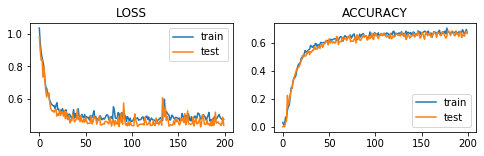

In [263]:
fig=plt.figure(figsize=(8,2))
plt.subplot(121)
plt.title("LOSS")
plt.plot(h.history['loss'], label='train')
plt.plot(h.history['val_loss'], label='test')
plt.legend()
plt.subplot(122)
plt.title("ACCURACY")
plt.plot(h.history['accuracy'], label='train')
plt.plot(h.history['val_accuracy'], label='test')
plt.legend()
plt.show()

# Multi-class classification
### Multi-class cross-entropy # sparse categorical cross-entropy

In [282]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=1000, centers=3, n_features=2,
                cluster_std=2, random_state=2)

In [283]:
print(X[:5], '  ', y[:5])

[[  0.48719811  -0.43160548]
 [ -1.48958879  -3.47915742]
 [ -2.06250444  -7.73300419]
 [ -0.51369303 -10.31546366]
 [  0.56240126  -2.18246169]]    [2 2 2 0 1]


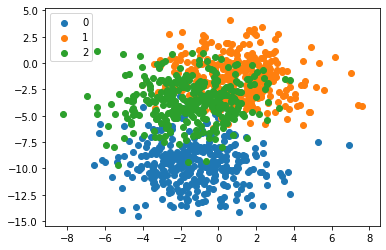

In [285]:
for i in range(3):
    samples_idx = where(y==i)
    plt.scatter(X[samples_idx,0], X[samples_idx,1], label=str(i))

plt.legend()
plt.show()

In [336]:
from keras.utils import to_categorical
X,y = make_blobs(n_samples=1000, centers=3, n_features=2,
                cluster_std=2, random_state=2)

y = to_categorical(y) #NO ONEHOT ENCODING FOR SPARSE

n_train=500
trainX,testX = X[:n_train,:],X[n_train:,:]
trainy,testy=y[:n_train],y[n_train:]

In [339]:
print(trainy.shape)
print(y[:5])

(500, 3)
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [340]:
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
opt=SGD(lr=0.01, momentum=0.9)
#model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=opt,
             metrics=['accuracy'], )
h = model.fit(trainX,trainy,validation_data=(testX,testy), epochs=200, verbose=1)

Train on 500 samples, validate on 500 samples
Epoch 1/200
500/500 [==============================] - 0s 686us/step - loss: 2.4690 - accuracy: 0.4380 - val_loss: 1.4963 - val_accuracy: 0.6140
Epoch 2/200
500/500 [==============================] - 0s 81us/step - loss: 1.9970 - accuracy: 0.5540 - val_loss: 3.7954 - val_accuracy: 0.6220
Epoch 3/200
500/500 [==============================] - 0s 105us/step - loss: 2.7608 - accuracy: 0.5740 - val_loss: 1.4630 - val_accuracy: 0.7000
Epoch 4/200
500/500 [==============================] - 0s 97us/step - loss: 1.5278 - accuracy: 0.6120 - val_loss: 0.5915 - val_accuracy: 0.7780
Epoch 5/200
500/500 [==============================] - 0s 114us/step - loss: 0.8942 - accuracy: 0.6600 - val_loss: 0.5917 - val_accuracy: 0.7800
Epoch 6/200
500/500 [==============================] - 0s 95us/step - loss: 0.6792 - accuracy: 0.6880 - val_loss: 0.5758 - val_accuracy: 0.7620
Epoch 7/200
500/500 [==============================] - 0s 105us/step - loss: 0.5949 - a

500/500 [==============================] - 0s 85us/step - loss: 0.4128 - accuracy: 0.8240 - val_loss: 0.4295 - val_accuracy: 0.8200
Epoch 58/200
500/500 [==============================] - 0s 88us/step - loss: 0.4080 - accuracy: 0.8280 - val_loss: 0.4056 - val_accuracy: 0.8200
Epoch 59/200
500/500 [==============================] - 0s 91us/step - loss: 0.4126 - accuracy: 0.8120 - val_loss: 0.4413 - val_accuracy: 0.8120
Epoch 60/200
500/500 [==============================] - 0s 88us/step - loss: 0.4094 - accuracy: 0.8100 - val_loss: 0.4101 - val_accuracy: 0.8220
Epoch 61/200
500/500 [==============================] - 0s 92us/step - loss: 0.4214 - accuracy: 0.8220 - val_loss: 0.4608 - val_accuracy: 0.8140
Epoch 62/200
500/500 [==============================] - 0s 95us/step - loss: 0.4473 - accuracy: 0.8000 - val_loss: 0.4581 - val_accuracy: 0.8040
Epoch 63/200
500/500 [==============================] - 0s 93us/step - loss: 0.4030 - accuracy: 0.8380 - val_loss: 0.4351 - val_accuracy: 0.818

500/500 [==============================] - 0s 80us/step - loss: 0.3915 - accuracy: 0.8260 - val_loss: 0.4297 - val_accuracy: 0.8160
Epoch 170/200
500/500 [==============================] - 0s 91us/step - loss: 0.3863 - accuracy: 0.8240 - val_loss: 0.4207 - val_accuracy: 0.8260
Epoch 171/200
500/500 [==============================] - 0s 94us/step - loss: 0.3862 - accuracy: 0.8300 - val_loss: 0.4496 - val_accuracy: 0.8060
Epoch 172/200
500/500 [==============================] - 0s 86us/step - loss: 0.3984 - accuracy: 0.8300 - val_loss: 0.4250 - val_accuracy: 0.8120
Epoch 173/200
500/500 [==============================] - 0s 79us/step - loss: 0.4270 - accuracy: 0.8100 - val_loss: 0.4592 - val_accuracy: 0.8100
Epoch 174/200
500/500 [==============================] - 0s 77us/step - loss: 0.4164 - accuracy: 0.8260 - val_loss: 0.4254 - val_accuracy: 0.8180
Epoch 175/200
500/500 [==============================] - 0s 91us/step - loss: 0.4066 - accuracy: 0.8220 - val_loss: 0.4643 - val_accuracy:

In [342]:
model.metrics_names

['loss', 'accuracy']

In [343]:
#res_train = model.evaluate(trainX,trainy)
#res_test = model.evaluate(testX, testy)
#print('Train acc:{:.4f}  Test acc:{:.4f}'.format(res_train[1], res_test[1]))

500/500 [==============================] - 0s 33us/step
Train acc:0.8320  Test acc:0.8260


In [344]:
h.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

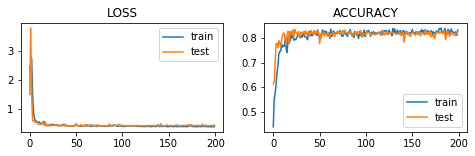

In [345]:
fig=plt.figure(figsize=(8,2))
plt.subplot(121)
plt.title("LOSS")
plt.plot(h.history['loss'], label='train')
plt.plot(h.history['val_loss'], label='test')
plt.legend()
plt.subplot(122)
plt.title("ACCURACY")
plt.plot(h.history['accuracy'], label='train')
plt.plot(h.history['val_accuracy'], label='test')
plt.legend()
plt.show()

### Sparse multi-class cross-entropy

In [349]:
from keras.utils import to_categorical
X,y = make_blobs(n_samples=1000, centers=3, n_features=2,
                cluster_std=2, random_state=2)

#y = to_categorical(y) NO ONEHOT ENCODING FOR SPARSE

n_train=500
trainX,testX = X[:n_train,:],X[n_train:,:]
trainy,testy=y[:n_train],y[n_train:]

print(trainy.shape)
print(y[:5])

(500,)
[2 2 2 0 1]


In [346]:
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
opt=SGD(lr=0.01, momentum=0.9)
#model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,
             metrics=['accuracy'], )
h = model.fit(trainX,trainy,validation_data=(testX,testy), epochs=200, verbose=1)

#res_train = model.evaluate(trainX,trainy)
#res_test = model.evaluate(testX, testy)
#print('Train acc:{:.4f}  Test acc:{:.4f}'.format(res_train[1], res_test[1]))


(500,)
[2 2 2 0 1]
Train on 500 samples, validate on 500 samples
Epoch 1/200
500/500 [==============================] - 0s 705us/step - loss: 2.2811 - accuracy: 0.4880 - val_loss: 1.7288 - val_accuracy: 0.5140
Epoch 2/200
500/500 [==============================] - 0s 79us/step - loss: 1.3664 - accuracy: 0.5560 - val_loss: 1.0118 - val_accuracy: 0.6620
Epoch 3/200
500/500 [==============================] - 0s 105us/step - loss: 1.0256 - accuracy: 0.6300 - val_loss: 0.7930 - val_accuracy: 0.7000
Epoch 4/200
500/500 [==============================] - 0s 98us/step - loss: 0.7563 - accuracy: 0.6840 - val_loss: 0.6401 - val_accuracy: 0.7020
Epoch 5/200
500/500 [==============================] - 0s 109us/step - loss: 0.6075 - accuracy: 0.7400 - val_loss: 0.5677 - val_accuracy: 0.7600
Epoch 6/200
500/500 [==============================] - 0s 109us/step - loss: 0.7119 - accuracy: 0.6580 - val_loss: 0.5961 - val_accuracy: 0.7840
Epoch 7/200
500/500 [==============================] - 0s 109us/ste

Epoch 57/200
500/500 [==============================] - 0s 92us/step - loss: 0.3954 - accuracy: 0.8320 - val_loss: 0.4156 - val_accuracy: 0.8280
Epoch 58/200
500/500 [==============================] - 0s 88us/step - loss: 0.3968 - accuracy: 0.8240 - val_loss: 0.4117 - val_accuracy: 0.8200
Epoch 59/200
500/500 [==============================] - 0s 93us/step - loss: 0.4014 - accuracy: 0.8280 - val_loss: 0.4219 - val_accuracy: 0.8200
Epoch 60/200
500/500 [==============================] - 0s 85us/step - loss: 0.4250 - accuracy: 0.8200 - val_loss: 0.4292 - val_accuracy: 0.8200
Epoch 61/200
500/500 [==============================] - 0s 82us/step - loss: 0.4144 - accuracy: 0.8200 - val_loss: 0.4218 - val_accuracy: 0.8320
Epoch 62/200
500/500 [==============================] - 0s 83us/step - loss: 0.4157 - accuracy: 0.8220 - val_loss: 0.4191 - val_accuracy: 0.8240
Epoch 63/200
500/500 [==============================] - 0s 94us/step - loss: 0.4244 - accuracy: 0.8140 - val_loss: 0.4214 - val_ac

500/500 [==============================] - 0s 86us/step - loss: 0.3873 - accuracy: 0.8200 - val_loss: 0.4308 - val_accuracy: 0.8240
Epoch 170/200
500/500 [==============================] - 0s 89us/step - loss: 0.3925 - accuracy: 0.8320 - val_loss: 0.4392 - val_accuracy: 0.8260
Epoch 171/200
500/500 [==============================] - 0s 91us/step - loss: 0.3872 - accuracy: 0.8220 - val_loss: 0.4473 - val_accuracy: 0.8200
Epoch 172/200
500/500 [==============================] - 0s 87us/step - loss: 0.3957 - accuracy: 0.8340 - val_loss: 0.4533 - val_accuracy: 0.8140
Epoch 173/200
500/500 [==============================] - 0s 79us/step - loss: 0.3845 - accuracy: 0.8300 - val_loss: 0.4236 - val_accuracy: 0.8180
Epoch 174/200
500/500 [==============================] - 0s 87us/step - loss: 0.3847 - accuracy: 0.8300 - val_loss: 0.4272 - val_accuracy: 0.8160
Epoch 175/200
500/500 [==============================] - 0s 86us/step - loss: 0.3908 - accuracy: 0.8320 - val_loss: 0.4553 - val_accuracy:

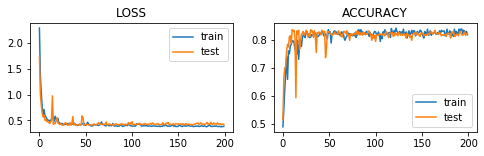

In [350]:

fig=plt.figure(figsize=(8,2))
plt.subplot(121)
plt.title("LOSS")
plt.plot(h.history['loss'], label='train')
plt.plot(h.history['val_loss'], label='test')
plt.legend()
plt.subplot(122)
plt.title("ACCURACY")
plt.plot(h.history['accuracy'], label='train')
plt.plot(h.history['val_accuracy'], label='test')
plt.legend()
plt.show()

### Kullback Leibler Divergence
Measure of how one probablity distribution differs form another
KL Div = 0 suggest dist are identical 
autoenoder used for learning dense featue representation under a model that must reconstruct the original input 

In [351]:
from sklearn.datasets import  make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [353]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2, cluster_std=2,
                 random_state=2)

In [354]:
y[:5]

array([2, 2, 2, 0, 1])

In [355]:
y = to_categorical(y)

In [356]:
y[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [357]:
n_train=500
trainX,testX = X[:n_train,:],X[n_train:,:]
trainy, testy = y[n_train:],y[:n_train]

In [359]:
model= Sequential()
model.add(Dense(50, input_dim=2, activation='relu',
               kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
opt=SGD(lr=0.01, momentum=0.9)
model.compile(loss='kullback_leibler_divergence', optimizer=opt, metrics=['accuracy'])

In [362]:
h = model.fit(trainX ,trainy, validation_data=(testX, testy),
             epochs =100, verbose=1)

Train on 500 samples, validate on 500 samples
Epoch 1/100
500/500 [==============================] - 0s 861us/step - loss: 3.2222 - accuracy: 0.3300 - val_loss: 1.8527 - val_accuracy: 0.3240
Epoch 2/100
500/500 [==============================] - 0s 88us/step - loss: 2.6674 - accuracy: 0.3320 - val_loss: 2.3745 - val_accuracy: 0.3500
Epoch 3/100
500/500 [==============================] - 0s 100us/step - loss: 1.6799 - accuracy: 0.3460 - val_loss: 1.2340 - val_accuracy: 0.3360
Epoch 4/100
500/500 [==============================] - 0s 117us/step - loss: 1.3474 - accuracy: 0.3560 - val_loss: 1.2829 - val_accuracy: 0.3220
Epoch 5/100
500/500 [==============================] - 0s 108us/step - loss: 1.3284 - accuracy: 0.3320 - val_loss: 1.1483 - val_accuracy: 0.3400
Epoch 6/100
500/500 [==============================] - 0s 116us/step - loss: 1.2210 - accuracy: 0.3760 - val_loss: 1.1812 - val_accuracy: 0.3500
Epoch 7/100
500/500 [==============================] - 0s 102us/step - loss: 1.1702 -

Epoch 57/100
500/500 [==============================] - 0s 105us/step - loss: 1.0781 - accuracy: 0.3980 - val_loss: 1.1489 - val_accuracy: 0.3680
Epoch 58/100
500/500 [==============================] - 0s 94us/step - loss: 1.0874 - accuracy: 0.4000 - val_loss: 1.1351 - val_accuracy: 0.3400
Epoch 59/100
500/500 [==============================] - 0s 91us/step - loss: 1.0826 - accuracy: 0.3980 - val_loss: 1.1200 - val_accuracy: 0.3680
Epoch 60/100
500/500 [==============================] - 0s 88us/step - loss: 1.0754 - accuracy: 0.3920 - val_loss: 1.1585 - val_accuracy: 0.3300
Epoch 61/100
500/500 [==============================] - 0s 97us/step - loss: 1.0890 - accuracy: 0.3940 - val_loss: 1.1718 - val_accuracy: 0.3580
Epoch 62/100
500/500 [==============================] - 0s 93us/step - loss: 1.0889 - accuracy: 0.3840 - val_loss: 1.1730 - val_accuracy: 0.3420
Epoch 63/100
500/500 [==============================] - 0s 94us/step - loss: 1.0821 - accuracy: 0.4040 - val_loss: 1.1326 - val_a

In [366]:
#model.evaluate(trainX,trainy,verbose=1)

500/500 [==============================] - 0s 49us/step


[1.0587191171646118, 0.41600000858306885]

In [363]:
model.metrics_names

['loss', 'accuracy']

In [364]:
h.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

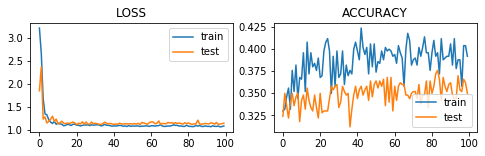

In [365]:
fig=plt.figure(figsize=(8,2))
plt.subplot(121)
plt.title("LOSS")
plt.plot(h.history['loss'], label='train')
plt.plot(h.history['val_loss'], label='test')
plt.legend()
plt.subplot(122)
plt.title("ACCURACY")
plt.plot(h.history['accuracy'], label='train')
plt.plot(h.history['val_accuracy'], label='test')
plt.legend()
plt.show()

FIN